['Results\\s1c08.json', 'Results\\s1c16.json', 'Results\\s1c32.json', 'Results\\s1c64.json', 'Results\\s2c08.json', 'Results\\s2c16 erl.json', 'Results\\s2c16 exp.json', 'Results\\s2c16 uni.json', 'Results\\s2c16.json', 'Results\\s2c16diff.json', 'Results\\s2c16skip0.json', 'Results\\s2c16skip1.json', 'Results\\s2c16skip2.json', 'Results\\s2c16skip3.json', 'Results\\s2c32.json', 'Results\\s2c64.json', 'Results\\s4c08.json', 'Results\\s4c16.json', 'Results\\s4c32.json', 'Results\\s4c64.json', 'Results\\s6c08.json', 'Results\\s6c16.json', 'Results\\s6c32.json', 'Results\\s6c64.json']


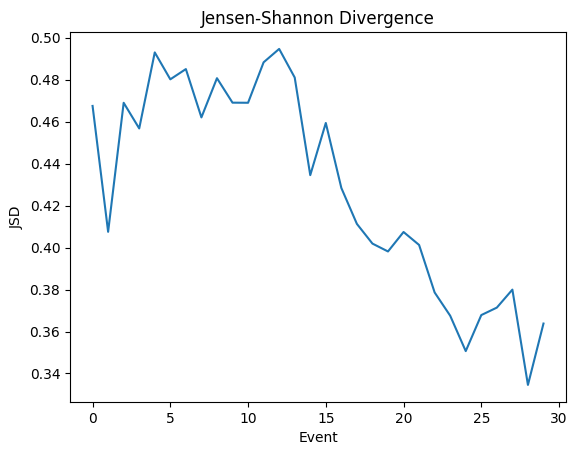

In [27]:
import json
import os

paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
print(paths)
first_file = paths[2]
skip_prob = 32
num_experiments = 25
with open(first_file, "r") as f:
    data = json.load(f)
    JSD = [0.0] * skip_prob 
    counter = [0] * skip_prob
    for i, experiment in enumerate(data["experiments"]):
        if i < num_experiments:
            JSD = [JSD[j] + experiment["JSD"][j] for j in range(len(experiment["JSD"]))]
    JSD = [JSD[j] / num_experiments for j in range(len(JSD))]
    JSD = [JSD[j] for j in range(len(JSD)) if JSD[j] != 0.0]
    import matplotlib.pyplot as plt

    plt.plot(JSD)
    plt.xlabel("Event")
    plt.ylabel("JSD")
    plt.title("Jensen-Shannon Divergence")
    plt.show()

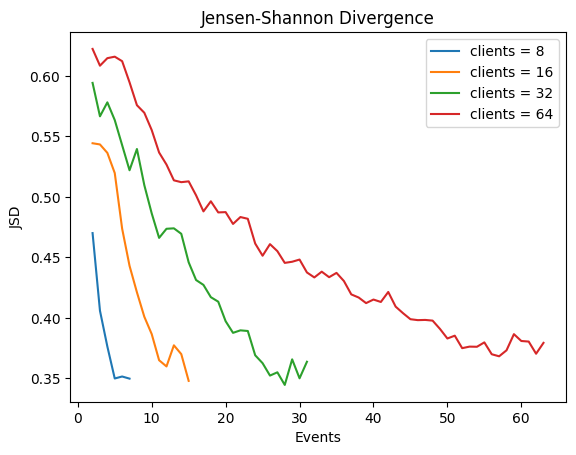

In [22]:
import json 
import os

# Calcolare la JSD per c = 8, c = 16, c = 32, c = 64
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substrings = ["c08", "c16", "c32", "c64"]
n_clients = [8, 16, 32, 64]
JSDs = {}
for substring, skip_prob in zip(substrings, n_clients):
    JSD = [0.0] * skip_prob 
    counter = [0] * skip_prob
    substring = substring + ".json"
    for file in paths:
        if substring in file:
            with open(file, "r") as f:
                data = json.load(f)
                for i, experiment in enumerate(data["experiments"]):
                    if i < num_experiments:
                        for j in range(len(experiment["JSD"])):
                            JSD[j] += experiment["JSD"][j]
                            counter[j] += 1    
    for j in range(len(JSD)):
        if counter[j] != 0:
            JSD[j] /= counter[j]
    JSDs[skip_prob] = JSD

import matplotlib.pyplot as plt

# Plotting JSDs
for skip_prob, JSD in JSDs.items():
    plt.plot(range(2, len(JSD)), JSD[:-2], label=f"clients = {skip_prob}")

plt.xlabel("Events")
plt.ylabel("JSD")
plt.title("Jensen-Shannon Divergence")
plt.legend()
plt.show()


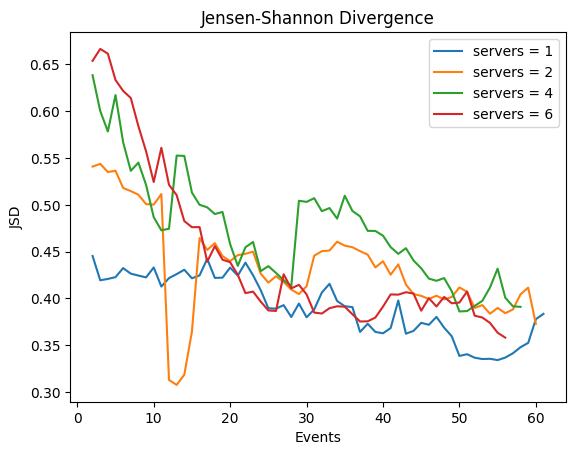

In [23]:
import json 
import os

# Calcolare la JSD per s = 1, s = 2, s = 4, s = 6
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substrings = ["s1", "s2", "s4", "s6"]
n_servers = [1, 2, 4, 6]
JSDs = {}
for substring, skip_prob in zip(substrings, n_servers):
    JSD = [0.0] * 64
    counter = [0] * 64
    for file in sorted(paths):
        if substring in file and ("skip" not in file or "diff" not in file or "erl" not in file or "exp" not in file or "uni" not in file):
            # print(file)
            with open(file, "r") as f:
                data = json.load(f)
                # print(len(data["experiments"][0]["JSD"]))
                for i, experiment in enumerate(data["experiments"]):
                    if i < num_experiments:
                        for j in range(len(experiment["JSD"])):
                            JSD[j] += experiment["JSD"][j]
                            counter[j] += 1    
    for j in range(len(JSD)):
        if counter[j] != 0:
            JSD[j] /= counter[j]
    # pop from the list the values == 0.0
    JSD = [JSD[j] for j in range(len(JSD)) if JSD[j] != 0.0]
    JSDs[skip_prob] = JSD

import matplotlib.pyplot as plt

# Plotting JSDs
for skip_prob, JSD in JSDs.items():
    plt.plot(range(2, len(JSD)), JSD[:-2], label=f"servers = {skip_prob}")

plt.xlabel("Events")
plt.ylabel("JSD")
plt.title("Jensen-Shannon Divergence")
plt.legend()
plt.show()

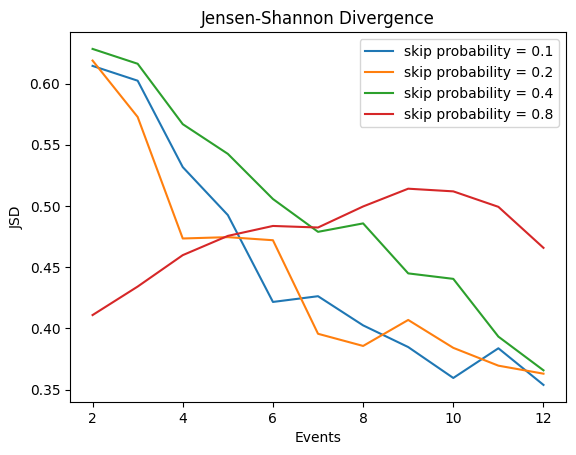

In [1]:
import json 
import os

# Calcolare la JSD per skip prob = 0.1, 0.2, 0.4, 0.8
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substring = "skip"
JSDs = {}
skip_prob = 16
skip_probs = [0.1, 0.2, 0.4, 0.8]
skip_prob_files = [os.path.join("Results", f"s2c16skip{i}.json") for i in range(0, 4)]
for skip_prob, file in zip(skip_probs, skip_prob_files):
    JSD = [0.0] * skip_prob 
    counter = [0] * skip_prob
    with open(file, "r") as f:
        data = json.load(f)
        for i, experiment in enumerate(data["experiments"]):
            if i < num_experiments:
                for j in range(len(experiment["JSD"])):
                    JSD[j] += experiment["JSD"][j]
                    counter[j] += 1    
    for j in range(len(JSD)):
        if counter[j] != 0:
            JSD[j] /= counter[j]
    JSD = [JSD[j] for j in range(len(JSD)) if JSD[j] != 0.0]
    JSDs[skip_prob] = JSD

import matplotlib.pyplot as plt

# Plotting JSDs
for skip_prob, JSD in JSDs.items():
    plt.plot(range(2, len(JSD)), JSD[:-2], label=f"skip probability = {skip_prob}")

plt.xlabel("Events")
plt.ylabel("JSD")
plt.title("Jensen-Shannon Divergence")
plt.legend()
plt.show()


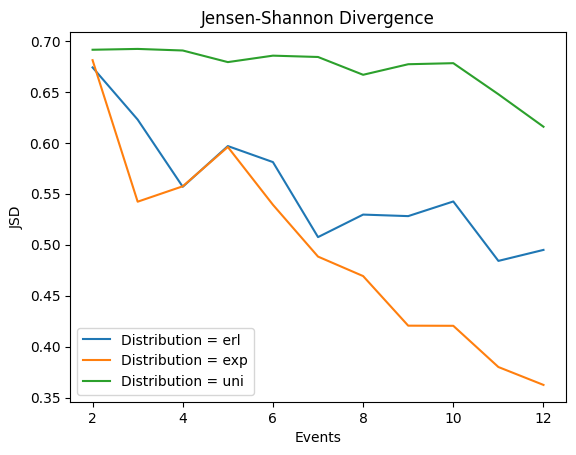

In [29]:
import json 
import os

# Calcolare la JSD per distribuzioni diverse
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
JSDs = {}
skip_prob = 16
distr = ["erl", "exp", "uni"]
dist_files = [os.path.join("Results", f"s2c16 {i}.json") for i in distr]
for dist, file in zip(distr, dist_files):
    JSD = [0.0] * skip_prob 
    counter = [0] * skip_prob
    with open(file, "r") as f:
        data = json.load(f)
        for i, experiment in enumerate(data["experiments"]):
            if i < num_experiments:
                for j in range(len(experiment["JSD"])):
                    JSD[j] += experiment["JSD"][j]
                    counter[j] += 1    
    for j in range(len(JSD)):
        if counter[j] != 0:
            JSD[j] /= counter[j]
    JSD = [JSD[j] for j in range(len(JSD)) if JSD[j] != 0.0]
    JSDs[dist] = JSD

import matplotlib.pyplot as plt

# Plotting JSDs
for dist, JSD in JSDs.items():
    plt.plot(range(2, len(JSD)), JSD[:-2], label=f"Distribution = {dist}")


plt.xlabel("Events")
plt.ylabel("JSD")
plt.title("Jensen-Shannon Divergence")
plt.legend()
plt.show()

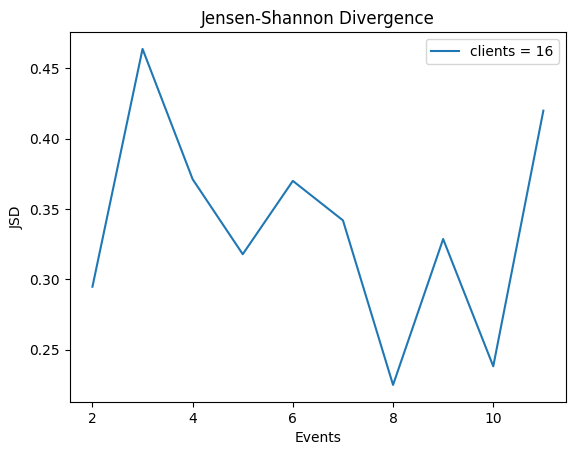

In [32]:
import json 
import os

# Calcolare la JSD per distribuzioni diverse
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 2500
JSDs = {}
skip_prob = 16
JSD = [0.0] * skip_prob 
counter = [0] * skip_prob
file = os.path.join("Results", "s2c16diff.json")
with open(file, "r") as f:
    data = json.load(f)
    for i, experiment in enumerate(data["experiments"]):
        if i < num_experiments:
            for j in range(len(experiment["JSD"])):
                JSD[j] += experiment["JSD"][j]
                counter[j] += 1    
for j in range(len(JSD)):
    if counter[j] != 0:
        JSD[j] /= counter[j]
JSD = [JSD[j] for j in range(len(JSD)) if JSD[j] != 0.0]

import matplotlib.pyplot as plt

# Plotting JSDs
plt.plot(range(2, len(JSD)), JSD[:-2], label=f"clients = {16}")


plt.xlabel("Events")
plt.ylabel("JSD")
plt.title("Jensen-Shannon Divergence")
plt.legend()
plt.show()

fare i grafici nell'altro modo

{8: {1: 0.3332982701785473, 2: 0.4021628783264684, 4: 0.47528519026579374, 6: 0.5439658692875812}, 16: {1: 0.39356410774011313, 2: 0.4238331428622232, 4: 0.47603135055745055, 6: 0.5377062026251689}, 32: {1: 0.4286888864858054, 2: 0.43213507782939126, 4: 0.4610637314247655, 6: 0.4932182358558948}, 64: {1: 0.4014880104800828, 2: 0.4627159985007127, 4: 0.5091992310321416, 6: 0.4626046282340562}}


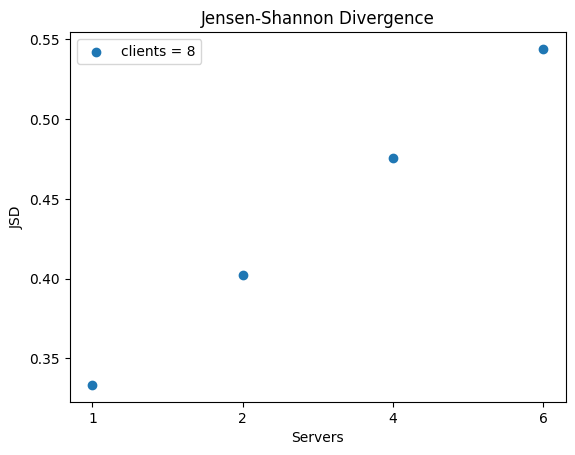

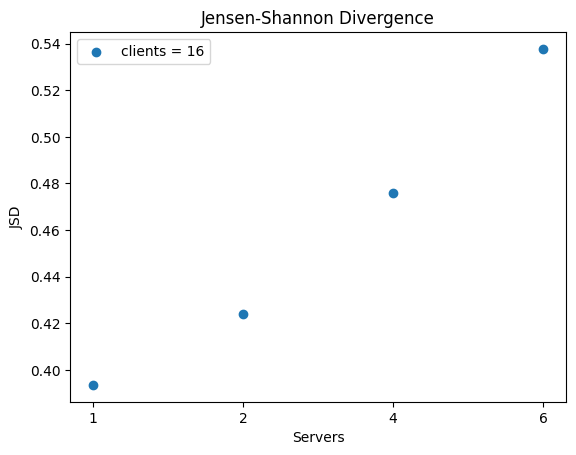

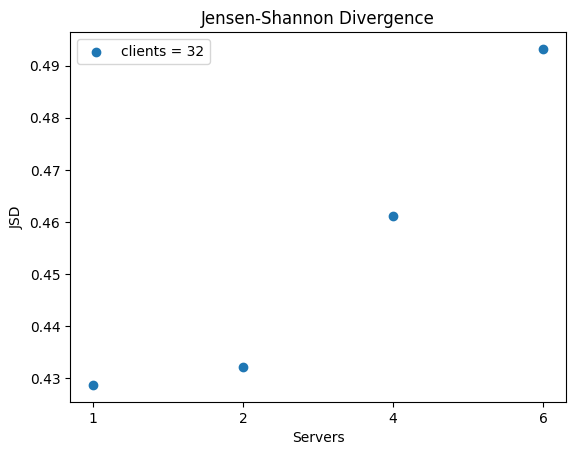

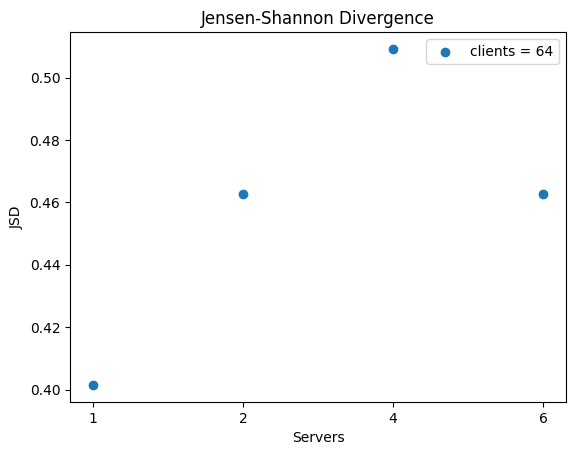

In [20]:
import json 
import os

# Calcolare la JSD al variare del numero dei servers
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substrings = ["c08", "c16", "c32", "c64"]
n_clients = [8, 16, 32, 64]
n_servers = [1, 2, 4, 6]
JSDs = {}
# for substring, clients in zip(substrings, n_clients):
#     JSD = [0.0] * clients 
#     counter = [0] * clients
#     substring = substring + ".json"
#     for file in paths:
#         if substring in file:
#             with open(file, "r") as f:
#                 data = json.load(f)
#                 for i, experiment in enumerate(data["experiments"]):
#                     if i < num_experiments:
#                         for j in range(len(experiment["JSD"])):
#                             JSD[j] += experiment["JSD"][j]
#                             counter[j] += 1    
#     for j in range(len(JSD)):
#         if counter[j] != 0:
#             JSD[j] /= counter[j]
#     JSDs[clients] = JSD

for substring, skip_prob in zip(substrings, n_clients):
    JSD = {}
    substring = substring + ".json"
    n_d = 0
    for file in paths:
        if substring in file:
            with open(file, "r") as f:
                data = json.load(f)
                mean_JSD = 0.0
                counter = 0
                for i, experiment in enumerate(data["experiments"]):
                    if i < num_experiments:
                        for j in range(len(experiment["JSD"])):
                            mean_JSD += experiment["JSD"][j]
                            counter += 1
                mean_JSD /= counter
                JSD[n_servers[n_d]] = mean_JSD
                n_d += 1
    JSDs[skip_prob] = JSD
print(JSDs)

import matplotlib.pyplot as plt

# Plotting JSDs
for skip_prob, JSD in JSDs.items():
    plt.scatter(range(1, len(JSD) + 1), list(JSD.values()), label=f"clients = {skip_prob}")

    plt.xlabel("Servers")
    plt.ylabel("JSD")
    plt.title("Jensen-Shannon Divergence")
    plt.xticks(range(1, len(JSD) + 1), list(JSD.keys()))
    plt.legend()
    plt.show()


Results\s1c08.json
Results\s1c16.json
Results\s1c32.json
Results\s1c64.json
Results\s2c08.json
Results\s2c16.json
Results\s2c32.json
Results\s2c64.json
Results\s4c08.json
Results\s4c16.json
Results\s4c32.json
Results\s4c64.json
Results\s6c08.json
Results\s6c16.json
Results\s6c32.json
Results\s6c64.json
{1: {8: 0.3332982701785473, 16: 0.39356410774011313, 32: 0.4286888864858054, 64: 0.4014880104800828}, 2: {8: 0.4021628783264684, 16: 0.4238331428622232, 32: 0.43213507782939126, 64: 0.4627159985007127}, 4: {8: 0.47528519026579374, 16: 0.47603135055745055, 32: 0.4610637314247655, 64: 0.5091992310321416}, 6: {8: 0.5439658692875812, 16: 0.5377062026251689, 32: 0.4932182358558948, 64: 0.4626046282340562}}


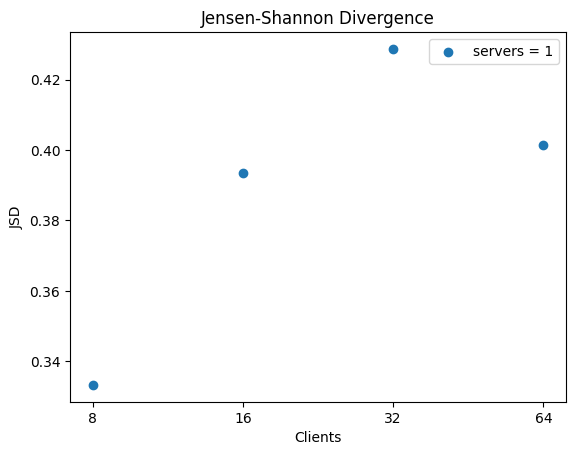

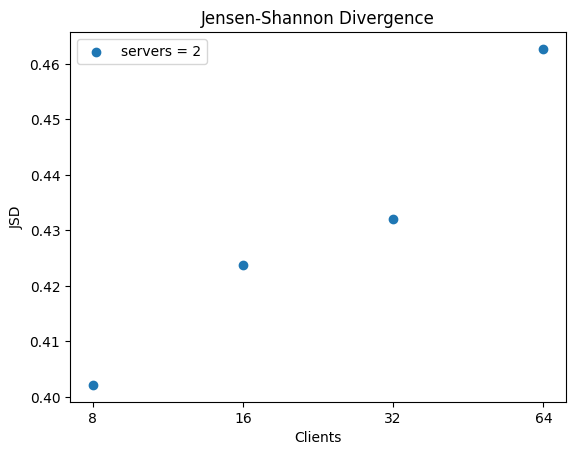

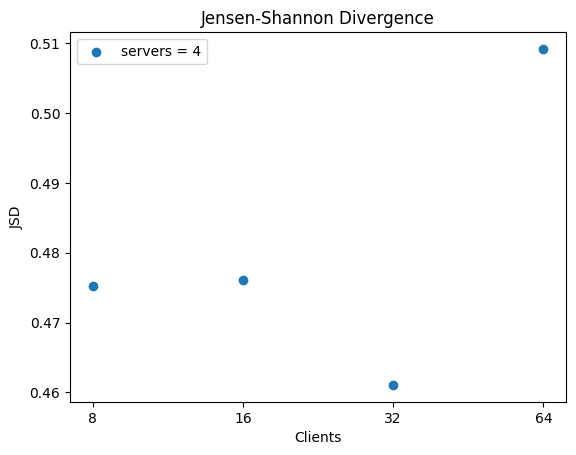

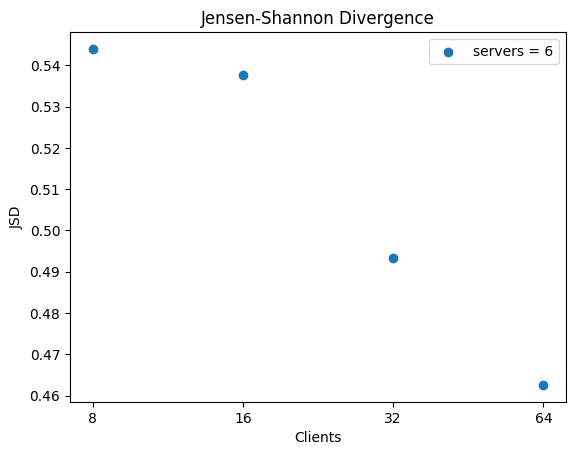

In [26]:
import json 
import os

# Calcolare la JSD al variare del numero dei clients
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substrings = ["s1", "s2", "s4", "s6"]
n_clients = [8, 16, 32, 64]
n_servers = [1, 2, 4, 6]
JSDs = {}
# for substring, clients in zip(substrings, n_clients):
#     JSD = [0.0] * clients 
#     counter = [0] * clients
#     substring = substring + ".json"
#     for file in paths:
#         if substring in file:
#             with open(file, "r") as f:
#                 data = json.load(f)
#                 for i, experiment in enumerate(data["experiments"]):
#                     if i < num_experiments:
#                         for j in range(len(experiment["JSD"])):
#                             JSD[j] += experiment["JSD"][j]
#                             counter[j] += 1    
#     for j in range(len(JSD)):
#         if counter[j] != 0:
#             JSD[j] /= counter[j]
#     JSDs[clients] = JSD

for substring, skip_prob in zip(substrings, n_servers):
    JSD = {}
    # substring = substring + ".json"
    n_d = 0
    for file in paths:
        if substring in file and "skip" not in file and "diff" not in file and "erl" not in file and "exp" not in file and "uni" not in file and ".json" in file:
            with open(file, "r") as f:
                data = json.load(f)
                print(file)
                mean_JSD = 0.0
                counter = 0
                for i, experiment in enumerate(data["experiments"]):
                    if i < num_experiments:
                        for j in range(len(experiment["JSD"])):
                            mean_JSD += experiment["JSD"][j]
                            counter += 1
                mean_JSD /= counter
                JSD[n_clients[n_d]] = mean_JSD
                n_d += 1
    JSDs[skip_prob] = JSD
print(JSDs)

import matplotlib.pyplot as plt

# Plotting JSDs
for skip_prob, JSD in JSDs.items():
    plt.scatter(range(1, len(JSD) + 1), list(JSD.values()), label=f"servers = {skip_prob}")

    plt.xlabel("Clients")
    plt.ylabel("JSD")
    plt.title("Jensen-Shannon Divergence")
    plt.xticks(range(1, len(JSD) + 1), list(JSD.keys()))
    plt.legend()
    plt.show()


    #s6c08 va male perché ci sono pochi tempi di attesa disponibili (perché il tagged customer ha visto entrare e uscire solo 2 clienti)


Results\s2c16skip0.json
Results\s2c16skip1.json
Results\s2c16skip2.json
Results\s2c16skip3.json
{0.2: {8: 0.4357338579527383, 16: 0.43198754984312693, 32: 0.4774713846569811, 64: 0.46904201661831885}}


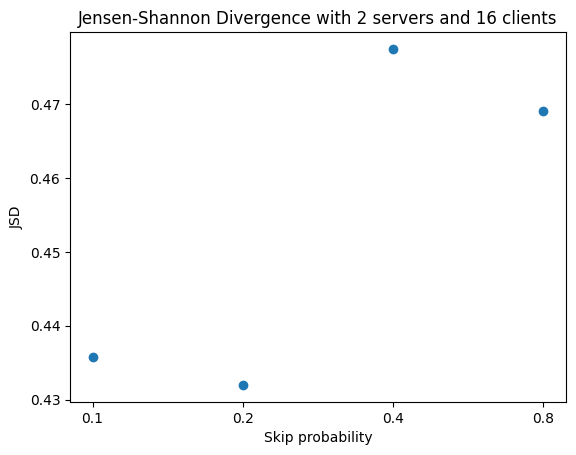

In [35]:
import json 
import os

# Calcolare la JSD al variare del numero della probabilità di skip
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substrings = ["s1", "s2", "s4", "s6"]
n_clients = [8, 16, 32, 64]
n_servers = [1, 2, 4, 6]
JSDs = {}
# for substring, clients in zip(substrings, n_clients):
#     JSD = [0.0] * clients 
#     counter = [0] * clients
#     substring = substring + ".json"
#     for file in paths:
#         if substring in file:
#             with open(file, "r") as f:
#                 data = json.load(f)
#                 for i, experiment in enumerate(data["experiments"]):
#                     if i < num_experiments:
#                         for j in range(len(experiment["JSD"])):
#                             JSD[j] += experiment["JSD"][j]
#                             counter[j] += 1    
#     for j in range(len(JSD)):
#         if counter[j] != 0:
#             JSD[j] /= counter[j]
#     JSDs[clients] = JSD
skip_probs = [0.1, 0.2, 0.4, 0.8]
for substring, skip_prob in zip(substrings, skip_probs):
    JSD = {}
    # substring = substring + ".json"
    n_d = 0
    for file in paths:
        if substring in file and "skip" in file and ".json" in file:
            with open(file, "r") as f:
                data = json.load(f)
                print(file)
                mean_JSD = 0.0
                counter = 0
                for i, experiment in enumerate(data["experiments"]):
                    if i < num_experiments:
                        for j in range(len(experiment["JSD"])):
                            mean_JSD += experiment["JSD"][j]
                            counter += 1
                mean_JSD /= counter
                JSD[n_clients[n_d]] = mean_JSD
                n_d += 1
    if JSD != {}:
        JSDs[skip_prob] = JSD
print(JSDs)

import matplotlib.pyplot as plt

# Plotting JSDs
for skip_prob, JSD in JSDs.items():
    plt.scatter(range(1, len(JSD) + 1), list(JSD.values()))

    plt.xlabel("Skip probability")
    plt.ylabel("JSD")
    plt.title("Jensen-Shannon Divergence with 2 servers and 16 clients")
    plt.xticks(range(1, len(skip_probs) + 1), skip_probs)
    plt.show()


Results\s2c16 erl.json
Results\s2c16 exp.json
Results\s2c16 uni.json
{2: {'erl': 0.5420515725403725, 'exp': 0.4754735344027948, 'uni': 0.6558275705453815}}


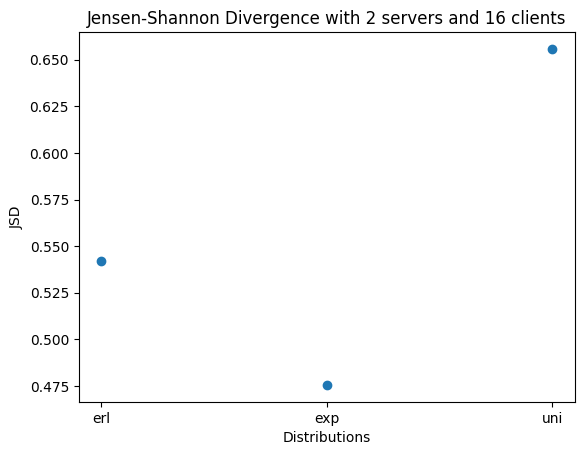

In [47]:
import json 
import os

# Calcolare la JSD al variare della distribuzione
paths = [os.path.join("Results", filename) for filename in sorted(os.listdir("Results"))]
num_experiments = 25
substrings = ["s1", "s2", "s4", "s6"]
n_clients = [8, 16, 32, 64]
n_servers = [1, 2, 4, 6]
JSDs = {}
# for substring, clients in zip(substrings, n_clients):
#     JSD = [0.0] * clients 
#     counter = [0] * clients
#     substring = substring + ".json"
#     for file in paths:
#         if substring in file:
#             with open(file, "r") as f:
#                 data = json.load(f)
#                 for i, experiment in enumerate(data["experiments"]):
#                     if i < num_experiments:
#                         for j in range(len(experiment["JSD"])):
#                             JSD[j] += experiment["JSD"][j]
#                             counter[j] += 1    
#     for j in range(len(JSD)):
#         if counter[j] != 0:
#             JSD[j] /= counter[j]
#     JSDs[clients] = JSD
distributions = ["erl", "exp", "uni"]
for substring, servers in zip(substrings, n_servers):
    JSD = {}
    # substring = substring + ".json"
    n_d = 0
    for file in paths:
        if substring in file and ("erl" in file or "exp" in file or "uni" in file) and ".json" in file:
            with open(file, "r") as f:
                data = json.load(f)
                print(file)
                mean_JSD = 0.0
                counter = 0
                for i, experiment in enumerate(data["experiments"]):
                    if i < num_experiments:
                        for j in range(len(experiment["JSD"])):
                            mean_JSD += experiment["JSD"][j]
                            counter += 1
                mean_JSD /= counter
                JSD[distributions[n_d]] = mean_JSD
                n_d += 1
    if JSD != {}:
        JSDs[servers] = JSD
print(JSDs)

import matplotlib.pyplot as plt

# Plotting JSDs
for servers, JSD in JSDs.items():
    plt.scatter(range(1, len(JSD.keys()) + 1), list(JSD.values()))

    plt.xlabel("Distributions")
    plt.ylabel("JSD")
    plt.title("Jensen-Shannon Divergence with 2 servers and 16 clients")
    plt.xticks(range(1, len(distributions) + 1), distributions)
    plt.show()
